In [1]:
from photutils import datasets
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.utils.data import download_file

hdu_list = fits.open('nnsn3458.fit')
hdu_list.info()


Filename: nnsn3458.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (791, 781)   int32   


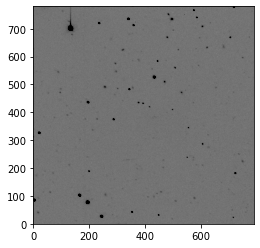

In [2]:
image_data = hdu_list[0].data

plt.figure()
plt.imshow(image_data, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)


In [3]:
from astropy.table import QTable, Table, Column
from astropy import units as u

a = np.array([134])
b = np.array([703])
c = Table([a, b], names = ('xcentroid', 'ycentroid'))
loc = np.array([c['xcentroid'], c['ycentroid']])
positions = np.transpose(loc)

In [4]:
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import CircularAnnulus

annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17)

annulus = aperture_photometry(image_data, annulus_apertures)

for col in annulus.colnames:
    annulus[col].info.format = '%.8g'
    
annulus

id,xcenter,ycenter,aperture_sum
,pix,pix,
int32,float64,float64,float64
1,134,703,389489.48


In [5]:
Star_count_list = []
aperture_sum_list = []
annulus_sum_list = []
bkg_list = []

radii = [1,2,3,4,5,6,7,8,9,10] 
 
for r in radii:
    apertures = CircularAperture(positions, r = r)
    phot_table1 = aperture_photometry(image_data, apertures)
    
    for col in phot_table1.colnames:
        phot_table1[col].info.format = '%.8g'
        
    annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17)
    apers = [apertures, annulus_apertures]
    phot_table = aperture_photometry(image_data, apers)
    
    
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    print(phot_table)
        
    bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area
    bkg_sum = bkg_mean * apertures.area
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    
    
    Star_count_list.append(final_sum)
    aperture_sum_list.append(phot_table['aperture_sum_0'])
    annulus_sum_list.append(phot_table['aperture_sum_1'])
    bkg_list.append(bkg_sum)

 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     134     703      101134.56      389489.48
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     134     703       394670.7      389489.48
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     134     703      789363.75      389489.48
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     134     703      1162409.8      389489.48
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     134     703      1489368.2      389489.48


In [6]:
bkg_mean = annulus['aperture_sum'] / annulus_apertures.area
bkg_sum = bkg_mean * apertures.area
print(bkg_mean)
print(Star_count_list[9])

aperture_sum
------------
   855.02311
aperture_sum_0
--------------
     1854856.5


In [7]:
import math as math

t = 300

Mag1 = -2.5 * math.log10(Star_count_list[0]) + math.log10(t)
Mag2 = -2.5 * math.log10(Star_count_list[1]) + math.log10(t)
Mag3 = -2.5 * math.log10(Star_count_list[2]) + math.log10(t)
Mag4 = -2.5 * math.log10(Star_count_list[3]) + math.log10(t)
Mag5 = -2.5 * math.log10(Star_count_list[4]) + math.log10(t)
Mag6 = -2.5 * math.log10(Star_count_list[5]) + math.log10(t)
Mag7 = -2.5 * math.log10(Star_count_list[6]) + math.log10(t)
Mag8 = -2.5 * math.log10(Star_count_list[7]) + math.log10(t)
Mag9 = -2.5 * math.log10(Star_count_list[8]) + math.log10(t)
Mag10 = -2.5 * math.log10(Star_count_list[9]) + math.log10(t)


Mag_list = [Mag1, Mag2, Mag3, Mag4, Mag5, Mag6, Mag7, Mag8, Mag9, Mag10]

Text(0, 0.5, 'Magnitude')

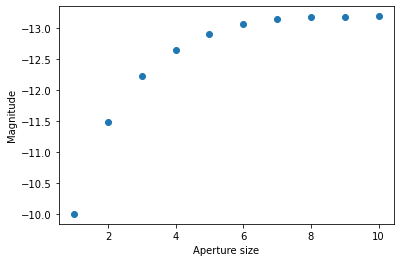

In [8]:
plt.scatter(radii, Mag_list) 
plt.gca().invert_yaxis()
plt.xlabel('Aperture size')
plt.ylabel('Magnitude')

In [9]:
x_list = list(range(117,152)) 
y_list = list(range(685,721))

annulus_sum = 0
annulus_area = 0
count = 0
count1 = 0

for i in x_list:
    for j in y_list:
        
        count = image_data[j, i]
        
        if count < 900:
            
            annulus_sum = annulus_sum + count           
            annulus_area = annulus_area + 1
            
        if count > 900:
            
            count1 = count1 + 1

apertures = CircularAperture(positions, r = 10)
phot_table1_58 = aperture_photometry(image_data, apertures)

for col in phot_table1_58.colnames:
        phot_table1_58[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table58 = aperture_photometry(image_data, apers)

print(phot_table58)
        
for col in phot_table58.colnames:
    phot_table58[col].info.format = '%.8g'
    
bkg_mean = annulus_sum / annulus_area
bkg_sum = bkg_mean * apertures.area

star_count = phot_table58['aperture_sum_0'] - bkg_sum

print(star_count)
print(bkg_mean)

mag_58 = -2.5 * math.log10(star_count) + math.log10(t)

print(mag_58)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1  
      pix     pix                                        
--- ------- ------- ------------------ ------------------
  1   134.0   703.0 2123469.9077501623 389489.47753383114
aperture_sum_0
--------------
     1859595.8
839.9373549883991
-13.196425139994584


 id xcenter ycenter   aperture_sum_0     aperture_sum_1 
      pix     pix                                       
--- ------- ------- ------------------ -----------------
  1   134.0   703.0 2160597.0646598944 385347.5781187989
aperture_sum_0
--------------
     1900089.6
829.2210526315789
-13.219813940600428


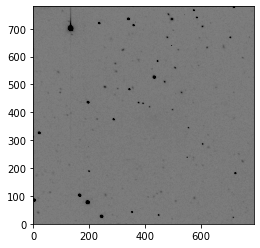

In [10]:
hdu_list59 = fits.open('nnsn3459.fit')
image_data59 = hdu_list59[0].data

plt.figure()
plt.imshow(image_data59, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum59 = 0
annulus_area59 = 0
count = 0
count1 = 0
area = 0

for n in x_list:
    for m in y_list:
        
        count = image_data59[m, n]
        
        if count < 900:
            
            annulus_sum59 = annulus_sum59 + count           
            annulus_area59 = annulus_area59 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_59 = aperture_photometry(image_data59, apertures)

for col in phot_table1_59.colnames:
        phot_table1_59[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table59 = aperture_photometry(image_data59, apers)

print(phot_table59)
        
for col in phot_table59.colnames:
    phot_table59[col].info.format = '%.8g'
    
bkg_meano_59 = phot_table59['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_59 = bkg_meano_59 * apertures.area
final_sumo_59 = phot_table59['aperture_sum_0'] - bkg_sumo_59
mago_59 = -2.5 * math.log10(final_sumo_59) + math.log10(t)
        
bkg_mean59 = annulus_sum59 / annulus_area59
bkg_sum59 = bkg_mean59 * apertures.area

star_count59 = phot_table59['aperture_sum_0'] - bkg_sum59

print(star_count59)
print(bkg_mean59)

mag_59 = -2.5 * math.log10(star_count59) + math.log10(t)

print(mag_59)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1  
      pix     pix                                        
--- ------- ------- ------------------ ------------------
  1   134.0   703.0 2161673.7468647156 383963.34596277843
aperture_sum_0
--------------
       1902999
823.3871733966746
-13.221475166776356


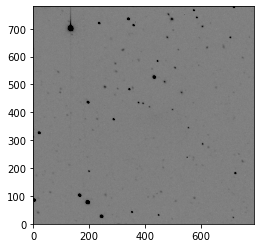

In [11]:
hdu_list60 = fits.open('nnsn3460.fit')
image_data60 = hdu_list60[0].data

plt.figure()
plt.imshow(image_data60, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum60 = 0
annulus_area60 = 0
count = 0
count1 = 0

for o in x_list:
    for p in y_list:
        
        count = image_data60[p, o]
        
        if count < 900:
            
            annulus_sum60 = annulus_sum60 + count           
            annulus_area60 = annulus_area60 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_60 = aperture_photometry(image_data60, apertures)

for col in phot_table1_60.colnames:
        phot_table1_60[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table60 = aperture_photometry(image_data60, apers)

print(phot_table60)
        
for col in phot_table60.colnames:
    phot_table60[col].info.format = '%.8g'
    
bkg_meano_60 = phot_table60['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_60 = bkg_meano_60 * apertures.area
final_sumo_60 = phot_table60['aperture_sum_0'] - bkg_sumo_60
mago_60 = -2.5 * math.log10(final_sumo_60) + math.log10(t)
        
bkg_mean60 = annulus_sum60 / annulus_area60
bkg_sum60 = bkg_mean60 * apertures.area

star_count60 = phot_table60['aperture_sum_0'] - bkg_sum60

print(star_count60)
print(bkg_mean60)

mag_60 = -2.5 * math.log10(star_count60) + math.log10(t)

print(mag_60)

In [12]:
a = np.array([99])
b = np.array([703])
c = Table([a, b], names = ('xcentroid', 'ycentroid'))
loc = np.array([c['xcentroid'], c['ycentroid']])
positions = np.transpose(loc)

x_list = list(range(82,117)) 
y_list = list(range(685,721)) 

 id xcenter ycenter   aperture_sum_0    aperture_sum_1 
      pix     pix                                      
--- ------- ------- ----------------- -----------------
  1    99.0   703.0 2028700.656728549 380681.4639294757
aperture_sum_0
--------------
     1771899.3
817.4241379310345
-13.143976330622278


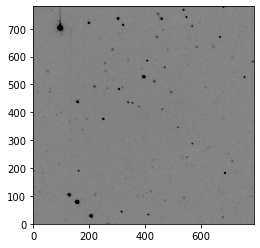

In [13]:
hdu_list61 = fits.open('nnsn3461.fit')
image_data61 = hdu_list61[0].data

plt.figure()
plt.imshow(image_data61, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum61 = 0
annulus_area61 = 0
count = 0
count1 = 0

for q in x_list:
    for w in y_list:
        
        count = image_data61[w, q]
        
        if count < 900:
            
            annulus_sum61 = annulus_sum61 + count           
            annulus_area61 = annulus_area61 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_61 = aperture_photometry(image_data61, apertures)

for col in phot_table1_61.colnames:
        phot_table1_61[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table61 = aperture_photometry(image_data61, apers)

print(phot_table61)
        
for col in phot_table61.colnames:
    phot_table61[col].info.format = '%.8g'
    
bkg_meano_61 = phot_table61['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_61 = bkg_meano_61 * apertures.area
final_sumo_61 = phot_table61['aperture_sum_0'] - bkg_sumo_61
mago_61 = -2.5 * math.log10(final_sumo_61) + math.log10(t)
        
bkg_mean61 = annulus_sum61 / annulus_area61
bkg_sum61 = bkg_mean61 * apertures.area

star_count61 = phot_table61['aperture_sum_0'] - bkg_sum61

print(star_count61)
print(bkg_mean61)

mag_61 = -2.5 * math.log10(star_count61) + math.log10(t)

print(mag_61)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1  
      pix     pix                                        
--- ------- ------- ------------------ ------------------
  1    99.0   703.0 2057139.8904268928 378121.82058062573
aperture_sum_0
--------------
     1801765.5
812.8819599109131
-13.162124407006564


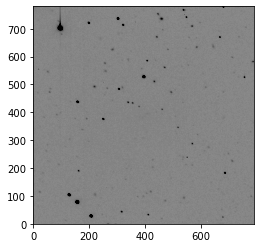

In [14]:
hdu_list62 = fits.open('nnsn3462.fit')
image_data62 = hdu_list62[0].data

plt.figure()
plt.imshow(image_data62, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum62 = 0
annulus_area62 = 0
count = 0
count1 = 0

for d in x_list:
    for s in y_list:
        
        count = image_data62[s, d]
        
        if count < 900:
            
            annulus_sum62 = annulus_sum62 + count           
            annulus_area62 = annulus_area62 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_62 = aperture_photometry(image_data62, apertures)

for col in phot_table1_62.colnames:
        phot_table1_62[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table62 = aperture_photometry(image_data62, apers)

print(phot_table62)
        
for col in phot_table62.colnames:
    phot_table62[col].info.format = '%.8g'
    
bkg_meano_62 = phot_table62['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_62 = bkg_meano_62 * apertures.area
final_sumo_62 = phot_table62['aperture_sum_0'] - bkg_sumo_62
mago_62 = -2.5 * math.log10(final_sumo_62) + math.log10(t)
        
bkg_mean62 = annulus_sum62 / annulus_area62
bkg_sum62 = bkg_mean62 * apertures.area

star_count62 = phot_table62['aperture_sum_0'] - bkg_sum62

print(star_count62)
print(bkg_mean62)

mag_62 = -2.5 * math.log10(star_count62) + math.log10(t)

print(mag_62)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1 
      pix     pix                                       
--- ------- ------- ------------------ -----------------
  1    99.0   703.0 2067752.9562350088 379232.1837202457
aperture_sum_0
--------------
     1811969.6
814.1837655016911
-13.168256002610233


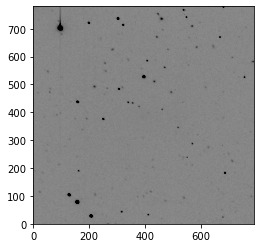

In [15]:
hdu_list63 = fits.open('nnsn3463.fit')
image_data63 = hdu_list63[0].data

plt.figure()
plt.imshow(image_data63, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum63 = 0
annulus_area63 = 0
count = 0
count1 = 0

for h in x_list:
    for y in y_list:
        
        count = image_data63[y, h]
        
        if count < 900:
            
            annulus_sum63 = annulus_sum63 + count           
            annulus_area63 = annulus_area63 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_63 = aperture_photometry(image_data63, apertures)

for col in phot_table1_63.colnames:
        phot_table1_63[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table63 = aperture_photometry(image_data63, apers)

print(phot_table63)
        
for col in phot_table63.colnames:
    phot_table63[col].info.format = '%.8g'
    
bkg_meano_63 = phot_table63['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_63 = bkg_meano_63 * apertures.area
final_sumo_63 = phot_table63['aperture_sum_0'] - bkg_sumo_63
mago_63 = -2.5 * math.log10(final_sumo_63) + math.log10(t)
        
bkg_mean63 = annulus_sum63 / annulus_area63
bkg_sum63 = bkg_mean63 * apertures.area

star_count63 = phot_table63['aperture_sum_0'] - bkg_sum63

print(star_count63)
print(bkg_mean63)

mag_63 = -2.5 * math.log10(star_count63) + math.log10(t)

print(mag_63)

 id xcenter ycenter  aperture_sum_0    aperture_sum_1 
      pix     pix                                     
--- ------- ------- ---------------- -----------------
  1    99.0   703.0 2068296.43804874 375450.9902038252
aperture_sum_0
--------------
     1815468.9
804.7751412429378
-13.17035076188692


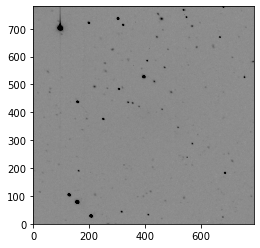

In [16]:
hdu_list64 = fits.open('nnsn3464.fit')
image_data64 = hdu_list64[0].data

plt.figure()
plt.imshow(image_data64, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum64 = 0
annulus_area64 = 0
count = 0
count1 = 0

for l in x_list:
    for k in y_list:
        
        count = image_data64[k, l]
        
        if count < 900:
            
            annulus_sum64 = annulus_sum64 + count           
            annulus_area64 = annulus_area64 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_64 = aperture_photometry(image_data64, apertures)

for col in phot_table1_64.colnames:
        phot_table1_64[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table64 = aperture_photometry(image_data64, apers)

print(phot_table64)
        
for col in phot_table64.colnames:
    phot_table64[col].info.format = '%.8g'
    
bkg_meano_64 = phot_table64['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_64 = bkg_meano_64 * apertures.area
final_sumo_64 = phot_table64['aperture_sum_0'] - bkg_sumo_64
mago_64 = -2.5 * math.log10(final_sumo_64) + math.log10(t)
        
bkg_mean64 = annulus_sum64 / annulus_area64
bkg_sum64 = bkg_mean64 * apertures.area

star_count64 = phot_table64['aperture_sum_0'] - bkg_sum64

print(star_count64)
print(bkg_mean64)

mag_64 = -2.5 * math.log10(star_count64) + math.log10(t)

print(mag_64)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1 
      pix     pix                                       
--- ------- ------- ------------------ -----------------
  1    99.0   703.0 2068243.9341418652 372025.6960811274
aperture_sum_0
--------------
     1816789.5
800.4044198895027
-13.171140255228059


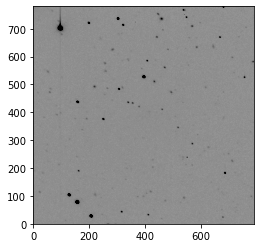

In [17]:
hdu_list65 = fits.open('nnsn3465.fit')
image_data65 = hdu_list65[0].data

plt.figure()
plt.imshow(image_data65, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum65 = 0
annulus_area65 = 0
count = 0
count1 = 0

for i in x_list:
    for j in y_list:
        
        count = image_data65[j, i]
        
        if count < 900:
            
            annulus_sum65 = annulus_sum65 + count           
            annulus_area65 = annulus_area65 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_65 = aperture_photometry(image_data65, apertures)

for col in phot_table1_65.colnames:
        phot_table1_65[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table65 = aperture_photometry(image_data65, apers)

print(phot_table65)
        
for col in phot_table65.colnames:
    phot_table65[col].info.format = '%.8g'
    
bkg_meano_65 = phot_table65['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_65 = bkg_meano_65 * apertures.area
final_sumo_65 = phot_table65['aperture_sum_0'] - bkg_sumo_65
mago_65 = -2.5 * math.log10(final_sumo_65) + math.log10(t)
        
bkg_mean65 = annulus_sum65 / annulus_area65
bkg_sum65 = bkg_mean65 * apertures.area

star_count65 = phot_table65['aperture_sum_0'] - bkg_sum65

print(star_count65)
print(bkg_mean65)

mag_65 = -2.5 * math.log10(star_count65) + math.log10(t)

print(mag_65)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1 
      pix     pix                                       
--- ------- ------- ------------------ -----------------
  1    99.0   703.0 2061487.6966461935 366112.8814949554
aperture_sum_0
--------------
     1813321.9
789.9362162162162
-13.169066021127147


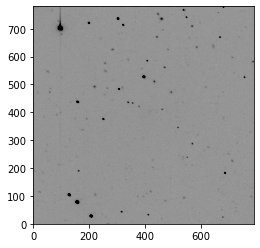

In [18]:
hdu_list66 = fits.open('nnsn3466.fit')
image_data66 = hdu_list66[0].data

plt.figure()
plt.imshow(image_data66, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum66 = 0
annulus_area66 = 0
count = 0
count1 = 0

for i in x_list:
    for j in y_list:
        
        count = image_data66[j, i]
        
        if count < 900:
            
            annulus_sum66 = annulus_sum66 + count           
            annulus_area66 = annulus_area66 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_66 = aperture_photometry(image_data66, apertures)

for col in phot_table1_66.colnames:
        phot_table1_66[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table66 = aperture_photometry(image_data66, apers)

print(phot_table66)
        
for col in phot_table66.colnames:
    phot_table66[col].info.format = '%.8g'
    
bkg_meano_66 = phot_table66['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_66 = bkg_meano_66 * apertures.area
final_sumo_66 = phot_table66['aperture_sum_0'] - bkg_sumo_66
mago_66 = -2.5 * math.log10(final_sumo_66) + math.log10(t)
        
bkg_mean66 = annulus_sum66 / annulus_area66
bkg_sum66 = bkg_mean66 * apertures.area

star_count66 = phot_table66['aperture_sum_0'] - bkg_sum66

print(star_count66)
print(bkg_mean66)

mag_66 = -2.5 * math.log10(star_count66) + math.log10(t)

print(mag_66)

 id xcenter ycenter   aperture_sum_0     aperture_sum_1  
      pix     pix                                        
--- ------- ------- ------------------ ------------------
  1    99.0   703.0 2061319.3310438313 365440.45452127827
aperture_sum_0
--------------
     1813705.9
788.1779206859593
-13.169295930353016


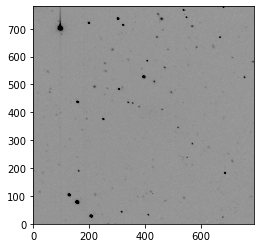

In [19]:
hdu_list67 = fits.open('nnsn3467.fit')
image_data67 = hdu_list67[0].data

plt.figure()
plt.imshow(image_data67, cmap = 'Greys', origin = 'lower', vmin = 500, vmax = 1000)

annulus_sum67 = 0
annulus_area67 = 0
count = 0
count1 = 0

for i in x_list:
    for j in y_list:
        
        count = image_data67[j, i]
        
        if count < 900:
            
            annulus_sum67 = annulus_sum67 + count           
            annulus_area67 = annulus_area67 + 1
            
        if count > 900:
            
            count1 = count1 + 1
            
apertures = CircularAperture(positions, r = 10)
phot_table1_67 = aperture_photometry(image_data67, apertures)

for col in phot_table1_67.colnames:
        phot_table1_67[col].info.format = '%.8g'
        
annulus_apertures = CircularAnnulus(positions, r_in = 12, r_out = 17) 
apers = [apertures, annulus_apertures]
phot_table67 = aperture_photometry(image_data67, apers)

print(phot_table67)
        
for col in phot_table67.colnames:
    phot_table67[col].info.format = '%.8g'
    
bkg_meano_67 = phot_table67['aperture_sum_1'] / annulus_apertures.area
bkg_sumo_67 = bkg_meano_67 * apertures.area
final_sumo_67 = phot_table67['aperture_sum_0'] - bkg_sumo_67
mago_67 = -2.5 * math.log10(final_sumo_67) + math.log10(t)
        
bkg_mean67 = annulus_sum67 / annulus_area67
bkg_sum67 = bkg_mean67 * apertures.area

star_count67 = phot_table67['aperture_sum_0'] - bkg_sum67

print(star_count67)
print(bkg_mean67)

mag_67 = -2.5 * math.log10(star_count67) + math.log10(t)

print(mag_67)

In [20]:
print(image_data[703, 134])
print(image_data59[703, 134])
print(image_data60[703, 134])
print(image_data61[703, 99])
print(image_data62[703, 99])
print(image_data63[703, 99])
print(image_data64[703, 99])
print(image_data65[703, 99])
print(image_data66[703, 99])
print(image_data67[703, 99])

32346
32347
32347
30848
31432
31663
31725
31824
31917
31980


In [21]:
print(star_count)
print(star_count59)
print(star_count60)
print(star_count61)
print(star_count62)
print(star_count63)
print(star_count64)
print(star_count65)
print(star_count66)
print(star_count67)

aperture_sum_0
--------------
     1859595.8
aperture_sum_0
--------------
     1900089.6
aperture_sum_0
--------------
       1902999
aperture_sum_0
--------------
     1771899.3
aperture_sum_0
--------------
     1801765.5
aperture_sum_0
--------------
     1811969.6
aperture_sum_0
--------------
     1815468.9
aperture_sum_0
--------------
     1816789.5
aperture_sum_0
--------------
     1813321.9
aperture_sum_0
--------------
     1813705.9


In [22]:
print(bkg_mean)
print(bkg_mean59)
print(bkg_mean60)
print(bkg_mean61)
print(bkg_mean62)
print(bkg_mean63)
print(bkg_mean64)
print(bkg_mean65)
print(bkg_mean66)
print(bkg_mean67)

839.9373549883991
829.2210526315789
823.3871733966746
817.4241379310345
812.8819599109131
814.1837655016911
804.7751412429378
800.4044198895027
789.9362162162162
788.1779206859593


In [23]:
print(annulus_sum)
print(annulus_sum59)
print(annulus_sum60)
print(annulus_sum61)
print(annulus_sum62)
print(annulus_sum63)
print(annulus_sum64)
print(annulus_sum65)
print(annulus_sum66)
print(annulus_sum67)

724026
708984
693292
711159
729968
722181
712226
724366
730691
735370


In [24]:
print(annulus_area)
print(annulus_area59)
print(annulus_area60)
print(annulus_area61)
print(annulus_area62)
print(annulus_area63)
print(annulus_area64)
print(annulus_area65)
print(annulus_area66)
print(annulus_area67)

862
855
842
870
898
887
885
905
925
933


In [25]:
print(Mag_list[9])
print(mago_59)
print(mago_60)
print(mago_61)
print(mago_62)
print(mago_63)
print(mago_64)
print(mago_65)
print(mago_66)
print(mago_67)

-13.193654521342872
-13.216810170967012
-13.217973489090301
-13.140454911828417
-13.158865945223903
-13.164801466707026
-13.166694040549945
-13.16807916721159
-13.166472794235492
-13.166650061329324


In [26]:
print(mag_58)
print(mag_59)
print(mag_61)
print(mag_62)
print(mag_63)
print(mag_64)
print(mag_65)
print(mag_66)
print(mag_67)

-13.196425139994584
-13.219813940600428
-13.143976330622278
-13.162124407006564
-13.168256002610233
-13.17035076188692
-13.171140255228059
-13.169066021127147
-13.169295930353016
